# Micro Credit Defaulter Project

##### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

##### Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

##### Points to Remember:

- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.

Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


### Import needed Libraries

In [168]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#save the model
import joblib

In [7]:
#load dataset
df=pd.read_csv('Data file.csv')

In [8]:
#display top 5 rows with all columns
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [9]:
#display all variables names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

##### More About Columns:

###### 1. Unnamed: 0

It's just an serial number column

###### 2. label

Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

###### 3. msisdn

mobile number of user

###### 4. aon

age on cellular network in days

###### 5. daily_decr30

Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

###### 6. daily_decr90

Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

###### 7. rental30

Average main account balance over last 30 days

###### 8. rental90

Average main account balance over last 90 days

###### 9. last_rech_date_ma

Number of days till last recharge of main account

###### 10. last_rech_date_da

Number of days till last recharge of data account

###### 11. last_rech_amt_ma

Amount of last recharge of main account (in Indonesian Rupiah)

###### 12. cnt_ma_rech30

Number of times main account got recharged in last 30 days

###### 13. fr_ma_rech30

Frequency of main account recharged in last 30 days

###### 14. sumamnt_ma_rech30

Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

###### 15. medianamnt_ma_rech30

Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

###### 16. medianmarechprebal30

Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

###### 17. cnt_ma_rech90 

Number of times main account got recharged in last 90 days

###### 18. fr_ma_rech90

Frequency of main account recharged in last 90 days

###### 19. sumamnt_ma_rech90

Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

###### 20. medianamnt_ma_rech90

Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

###### 21. medianmarechprebal90

Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

###### 22. cnt_da_rech30

Number of times data account got recharged in last 30 days 

###### 23. fr_da_rech30

Frequency of data account recharged in last 30 days

###### 24. cnt_da_rech90

Number of times data account got recharged in last 90 days

###### 25. fr_da_rech90

Frequency of data account recharged in last 90 days

###### 26. cnt_loans30	

Number of loans taken by user in last 30 days

###### 27. amnt_loans30	

Total amount of loans taken by user in last 30 days

There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

###### 28. maxamnt_loans30

maximum amount of loan taken by the user in last 30 days

###### 29. medianamnt_loans30

Median of amounts of loan taken by the user in last 30 days

###### 30. cnt_loans90

Number of loans taken by user in last 90 days

###### 31. amnt_loans90	

Total amount of loans taken by user in last 90 days

###### 32. maxamnt_loans90

maximum amount of loan taken by the user in last 90 days

###### 33. medianamnt_loans90

Median of amounts of loan taken by the user in last 90 days

###### 34. payback30

Average payback time in days over last 30 days

###### 35. payback90

Average payback time in days over last 90 days

###### 36. pcircle

telecom circle

###### 37. pdate

date

## Exploratory Data Analysis(EDA)

In [10]:
#drop Unnamed: 0 variable
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
#check the shape of dataset
df.shape

(209593, 36)

###### 209593 rows and 36 columns

In [12]:
#check datatype of variables
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [13]:
#some more information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

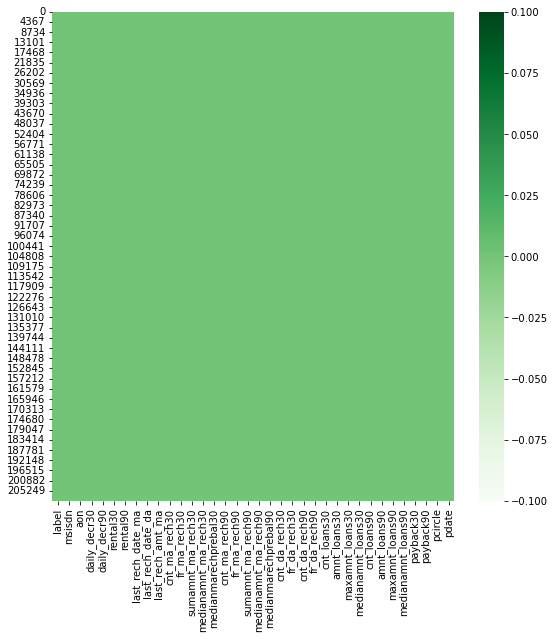

In [14]:
#check null values using heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df.isnull(),cmap='Greens');

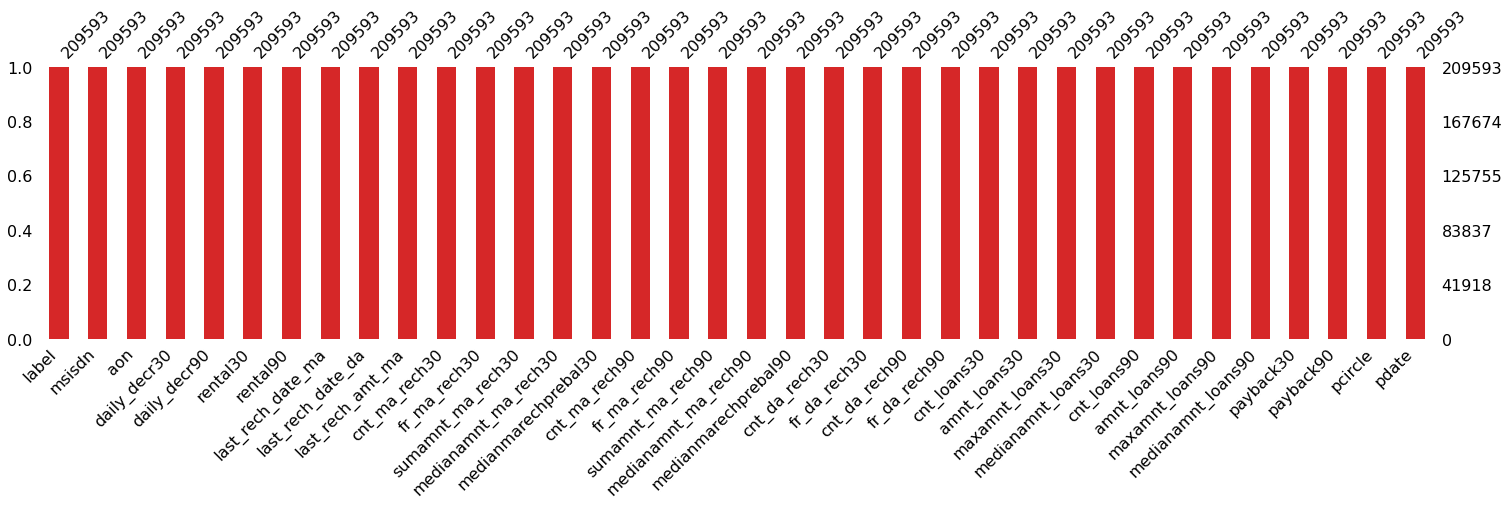

In [15]:
#check the null values using missingno 
missingno.bar(df,figsize=(25,5),color='tab:red');

In [16]:
#count null values in all variables
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [52]:
#date variable convert into day,month,year
df['Pay_Back_Day']=pd.to_datetime(df.pdate,format='%d-%m-%Y').dt.day
df['Pay_Back_Month']=pd.to_datetime(df.pdate,format='%d-%m-%Y').dt.month
df['Pay_Back_Year']=pd.to_datetime(df.pdate,format='%d-%m-%Y').dt.year

In [55]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Pay_Back_Day,Pay_Back_Month,Pay_Back_Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016,22,6,2016


In [56]:
df.drop('pdate',inplace=True,axis=1)

In [57]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Pay_Back_Day,Pay_Back_Month,Pay_Back_Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


In [58]:
#check object variable uniques
for i in df.columns:
    if df[i].dtypes== 'object':
        print(df[i].value_counts())
        print('*******************************************')

04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
*******************************************
UPW    209593
Name: pcircle, dtype: int64
*******************************************


In [59]:
#check object variable uniques
for i in df.columns:
    if df[i].dtypes== 'int64':
        print(df[i].value_counts())
        print('*******************************************')

1    183431
0     26162
Name: label, dtype: int64
*******************************************
1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
4066         1
15652        1
772          1
34783        1
10454        1
Name: last_rech_amt_ma, Length: 70, dtype: int64
*******************************************
1     37238
2     31216
0     27979
3     25519
4     20258
      ...  
84        1
59        1
64        1
74        1
63        1
Name: cnt_ma_rech30, Length: 71, dtype: int64
*******************************************
1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
105        1
110        1
140        1
94         1
120        1
Name: cnt_ma_rech90, Length: 110, dtype: int64
*******************************************
0     65753
1     24373
2     19285
3     13192
4     10021
      ...  
80        7
81        7
88        5
84        4
87        1
Name: fr_ma_rech90, Length: 89, dtype: int64
***************

In [60]:
#check object variable uniques
for i in df.columns:
    if df[i].dtypes== 'float64':
        print(df[i].value_counts())
        print('*******************************************')

95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
              ... 
977092.3520      1
645851.0384      1
881623.8154      1
555267.7977      1
811881.3728      1
Name: aon, Length: 4507, dtype: int64
*******************************************
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3679.110667       1
6940.330000       1
4878.826667       1
5110.382000       1
4489.362000       1
Name: daily_decr30, Length: 146328, dtype: int64
*******************************************
0.000000        4063
500.000000       782
1000.000000      490
700.000000       343
600.000000       319
                ... 
36454.750000       1
5099.050000        1
22.095333          1
12690.450000       1
4534.820000        1
Name: daily_decr90, Length: 155483, dtype: int64
*******************************************
0.00       7566
200.13     1379
99.56      1020
400.26      530
199.12  

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


### Correlation

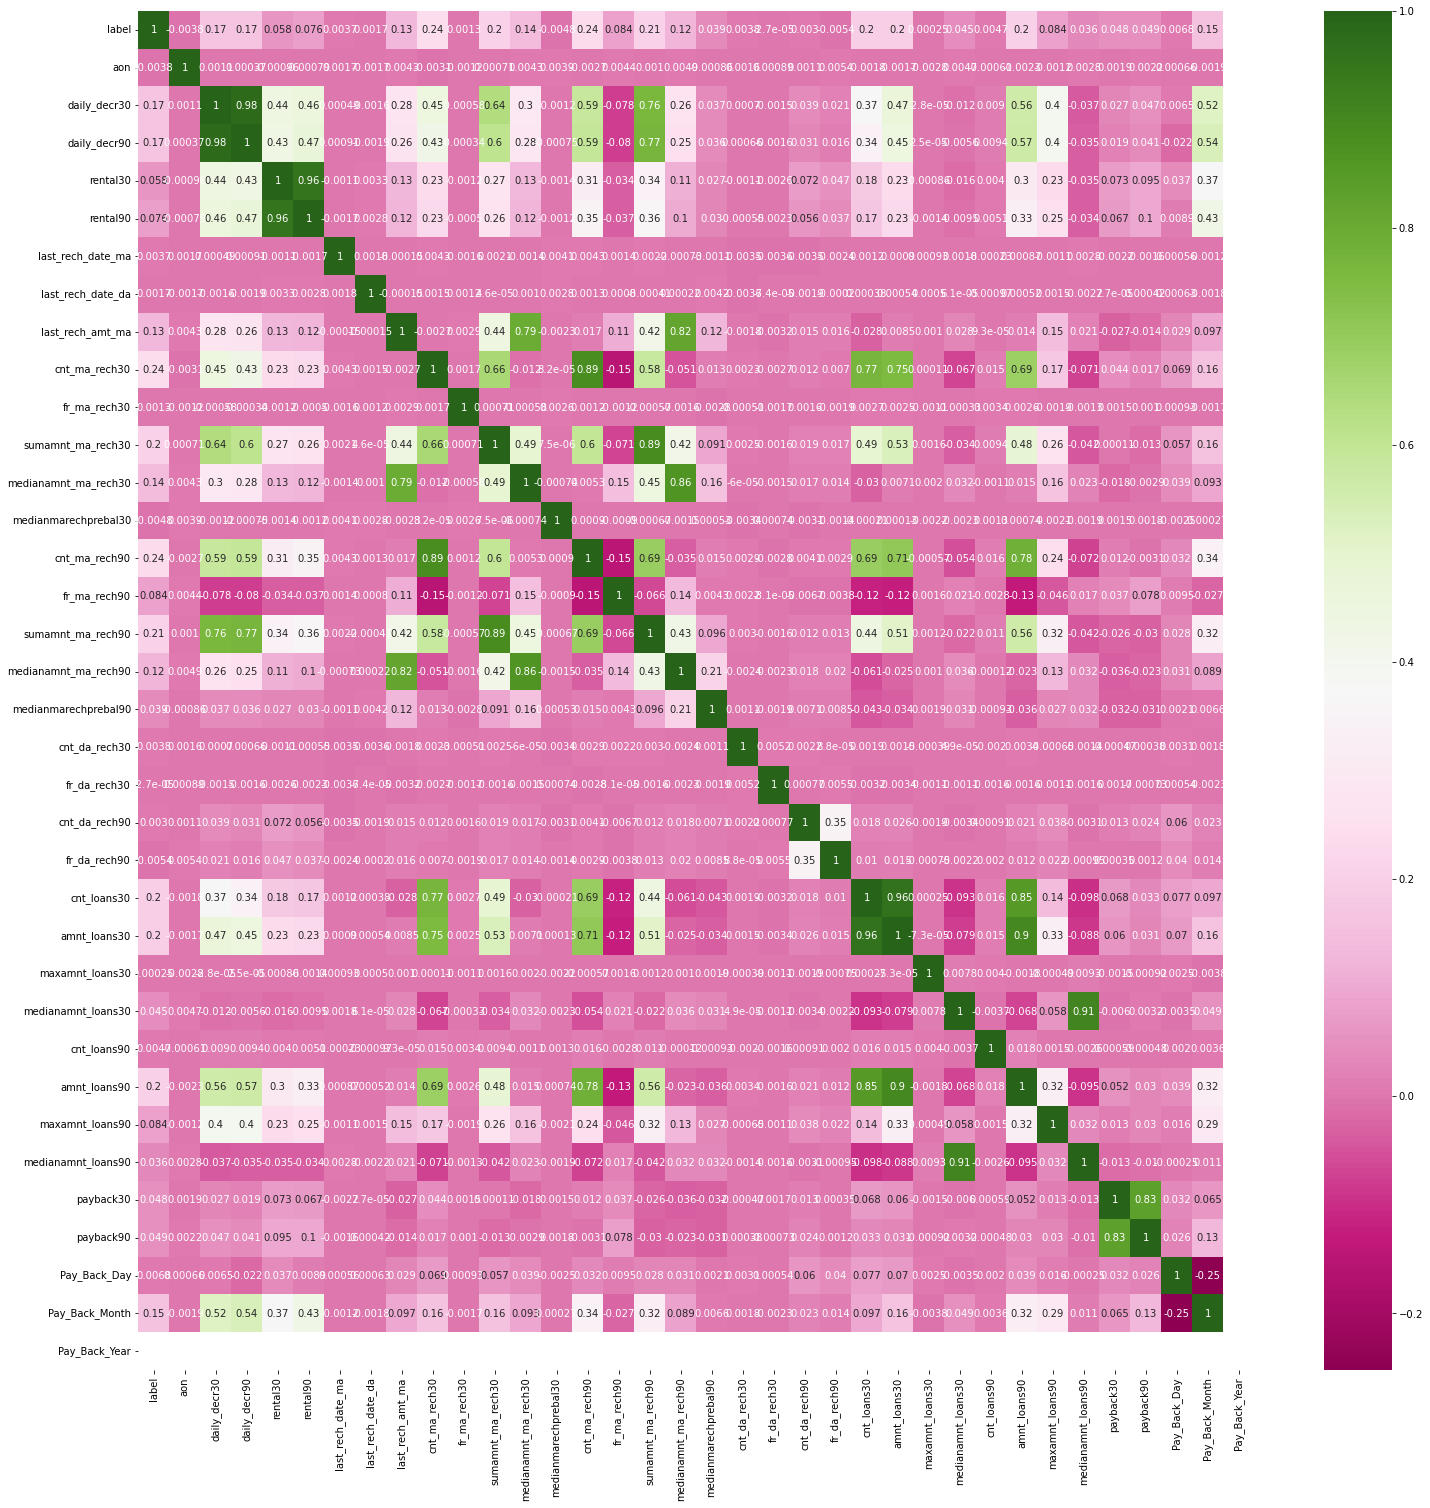

In [62]:
#check correlation with other by using heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='PiYG');

In [63]:
#check correlation with each other
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Pay_Back_Day,Pay_Back_Month,Pay_Back_Year
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949,NaN
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863,NaN
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664,NaN
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410,NaN
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699,NaN
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407,NaN
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207,NaN
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800,NaN
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919,NaN
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148,NaN


In [64]:
#correlation with target variable
df_target=df.corr()

In [65]:
df_target['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
Pay_Back_Month          0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
Pay_Back_Day            0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

### Count plot

In [69]:
#count the unique of maxamnt_loans90 variable
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

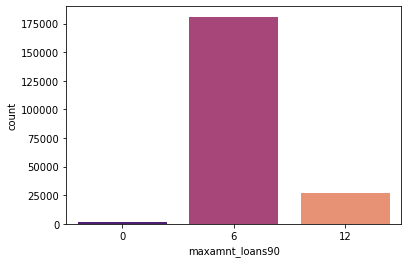

In [66]:
#count plot
sns.countplot('maxamnt_loans90',data=df,palette='magma');

In [70]:
#count the unique of target variable
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

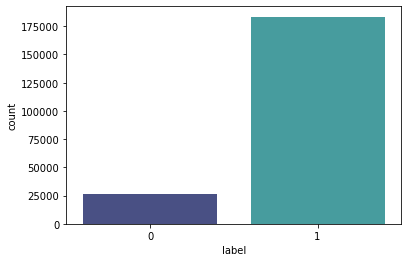

In [67]:
#count plot
sns.countplot('label',data=df,palette='mako');

In [71]:
#count the unique of Pay_Back_Day variable
df['Pay_Back_Day'].value_counts()

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Pay_Back_Day, dtype: int64

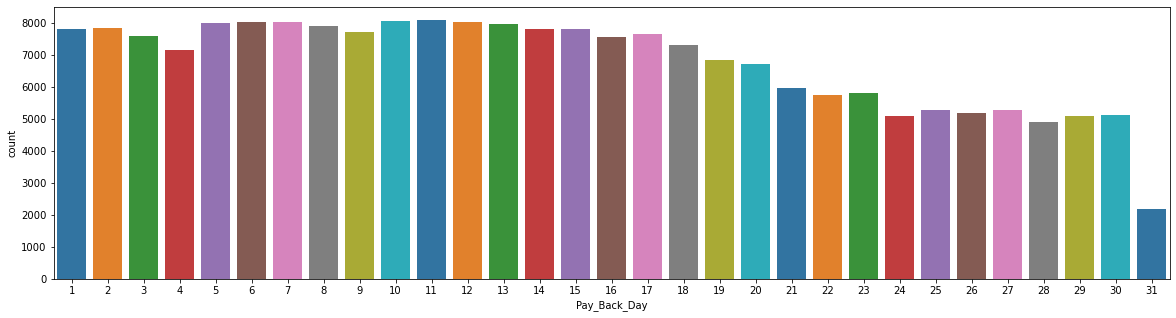

In [72]:
#count plot
plt.figure(figsize=(20,5))
sns.countplot('Pay_Back_Day',data=df,palette='tab10');

In [73]:
#count the unique of Pay_Back_Month variable
df['Pay_Back_Month'].value_counts()

7    85765
6    83154
8    40674
Name: Pay_Back_Month, dtype: int64

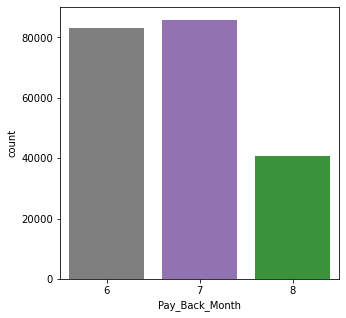

In [75]:
#count plot
plt.figure(figsize=(5,5))
sns.countplot('Pay_Back_Month',data=df,palette='tab10_r');

In [76]:
#count the unique of Pay_Back_Month variable
df['Pay_Back_Year'].value_counts()

2016    209593
Name: Pay_Back_Year, dtype: int64

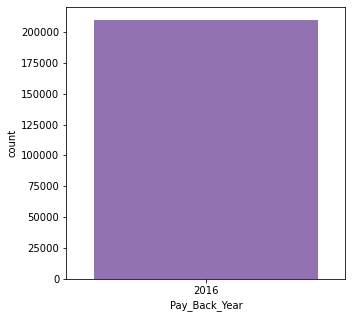

In [77]:
#count plot
plt.figure(figsize=(5,5))
sns.countplot('Pay_Back_Year',data=df,palette='tab10_r');

In [78]:
#There is only one year 2016
df.drop('Pay_Back_Year',inplace=True,axis=1)

In [80]:
#count the unique of Pay_Back_Month variable
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [81]:
#There is only UPW
df.drop('pcircle',inplace=True,axis=1)

In [82]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Pay_Back_Day,Pay_Back_Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


### Apply label Encoder

In [90]:
df1=df.copy()

In [91]:
dfx=df1.drop('label',axis=1)
dfy=df1['label']

In [96]:
#Apply label Encoder to convert all object variables into integers 
dfx=dfx.apply(LabelEncoder().fit_transform)

In [101]:
dfx.dtypes

msisdn                  int32
aon                     int64
daily_decr30            int64
daily_decr90            int64
rental30                int64
rental90                int64
last_rech_date_ma       int64
last_rech_date_da       int64
last_rech_amt_ma        int64
cnt_ma_rech30           int64
fr_ma_rech30            int64
sumamnt_ma_rech30       int64
medianamnt_ma_rech30    int64
medianmarechprebal30    int64
cnt_ma_rech90           int64
fr_ma_rech90            int64
sumamnt_ma_rech90       int64
medianamnt_ma_rech90    int64
medianmarechprebal90    int64
cnt_da_rech30           int64
fr_da_rech30            int64
cnt_da_rech90           int64
fr_da_rech90            int64
cnt_loans30             int64
amnt_loans30            int64
maxamnt_loans30         int64
medianamnt_loans30      int64
cnt_loans90             int64
amnt_loans90            int64
maxamnt_loans90         int64
medianamnt_loans90      int64
payback30               int64
payback90               int64
Pay_Back_D

### Apply SMOTE

In [97]:
#Apply SMOTE bcz dataset is imbalanced to make Balanced apply SMOTE
smt=SMOTE()

In [98]:
train_x,train_y=smt.fit_resample(dfx,dfy)

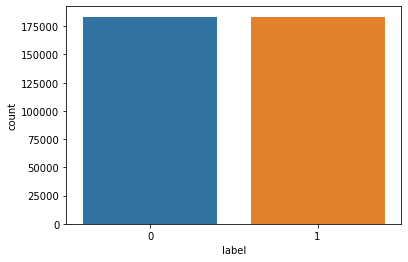

In [100]:
#countplot of target variable
sns.countplot(train_y);

In [102]:
x=train_x   #independent variables
y=train_y   #target variable

### Check the outliers

In [105]:
df1=x
df1['target']=y

In [111]:
df1.shape

(366862, 36)

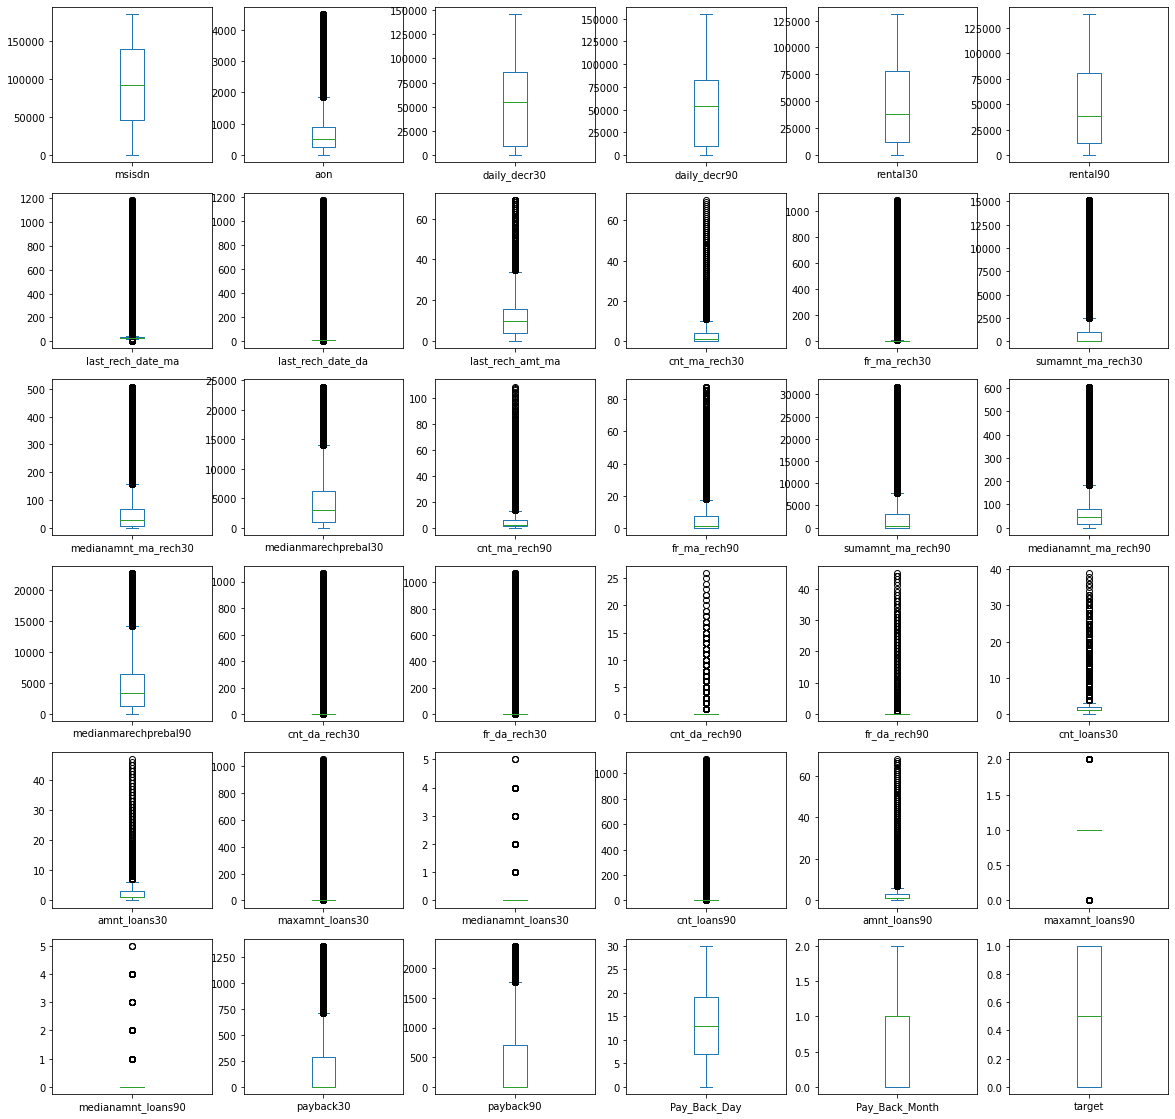

In [106]:
#check the outliers using boxplot
df1.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20));

In [107]:
#removing outliers
z=np.abs(zscore(df1))

In [109]:
threshold=3
print(np.where(z>3))

(array([     0,      1,     11, ..., 366855, 366859, 366859], dtype=int64), array([31, 29, 13, ..., 32, 13, 18], dtype=int64))


In [110]:
df_new=df1[(z<3).all(axis=1)]

In [112]:
df1.shape #before removing outliers

(366862, 36)

In [113]:
df_new.shape #after removing outliers

(269145, 36)

### Checking Skewness

In [114]:
x=df1.drop('target',axis=1)
y=df1['target']

In [118]:
x.skew().sort_values(ascending=False)

cnt_da_rech90           25.549625
fr_da_rech90            25.318823
cnt_da_rech30           19.160380
maxamnt_loans30         18.277907
fr_ma_rech30            17.885669
fr_da_rech30            17.860471
cnt_loans90             17.754680
last_rech_date_ma       17.056786
last_rech_date_da       17.036461
medianamnt_loans90       6.055008
medianamnt_loans30       5.690791
amnt_loans90             3.931668
amnt_loans30             3.671692
cnt_ma_rech90            3.425011
cnt_loans30              3.408220
cnt_ma_rech30            3.116806
sumamnt_ma_rech30        3.060387
fr_ma_rech90             2.541697
maxamnt_loans90          2.530318
sumamnt_ma_rech90        2.477428
medianamnt_ma_rech30     2.376485
medianamnt_ma_rech90     2.371800
aon                      1.903755
medianmarechprebal30     1.801409
medianmarechprebal90     1.688050
payback30                1.619364
payback90                1.296716
last_rech_amt_ma         1.268658
rental90                 0.615132
rental30      

In [120]:
#removing skewness
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [121]:
data=pipe.fit_transform(x)

In [122]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

### VIF factor

In [125]:
def vif():
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [126]:
vif()

,variables,VIF Factor
0,msisdn,1.000517
1,aon,1.038673
2,daily_decr30,410.487828
3,daily_decr90,436.184280
4,rental30,38.462725
5,rental90,42.354664
6,last_rech_date_ma,1.578291
7,last_rech_date_da,1.899259
8,last_rech_amt_ma,5.781400
9,cnt_ma_rech30,21.655833


In [127]:
#some variables have almost same VIF factor so drop some variables
x.drop('msisdn',axis=1,inplace=True)
x.drop('last_rech_date_da',axis=1,inplace=True)
x.drop('fr_ma_rech90',axis=1,inplace=True)
x.drop('payback90',axis=1,inplace=True)
x.drop('maxamnt_loans30',axis=1,inplace=True)
x.drop('fr_da_rech30',axis=1,inplace=True)
x.drop('medianmarechprebal90',axis=1,inplace=True)

### Apply Scaler

In [129]:
#apply scaler to get all data in same scaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [130]:
#check shape of input variables
print(x.shape)
#check shape of output variable
print(y.shape)

(366862, 28)
(366862,)


## Model Selection

In [132]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
etc=ExtraTreesClassifier()

In [133]:
models=[lg,dtc,knc,rfc,abc,gbc,etc]

### LogisticRegression

In [135]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.7974177486620813
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     58077
           1       0.77      0.81      0.79     51982

    accuracy                           0.80    110059
   macro avg       0.80      0.80      0.80    110059
weighted avg       0.80      0.80      0.80    110059



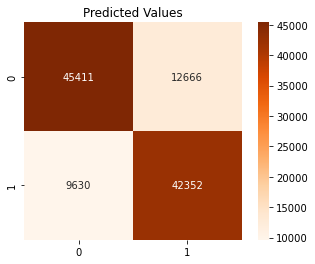

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

### DecisionTreeClassifier

In [139]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Blues',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.8996629080765771
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     55298
           1       0.90      0.90      0.90     54761

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



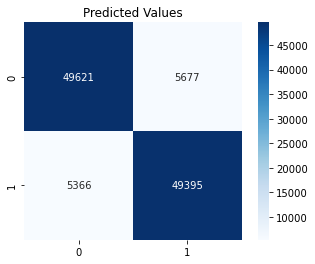

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

### KNeighborsClassifier

In [141]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Reds',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.893420801570067
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     58995
           1       0.86      0.92      0.89     51064

    accuracy                           0.89    110059
   macro avg       0.89      0.90      0.89    110059
weighted avg       0.90      0.89      0.89    110059



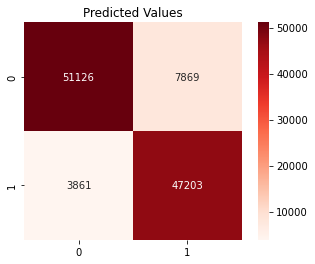

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

### RandamForestclassifier

In [143]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='viridis',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.9432213630870715
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     53448
           1       0.96      0.93      0.94     56611

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



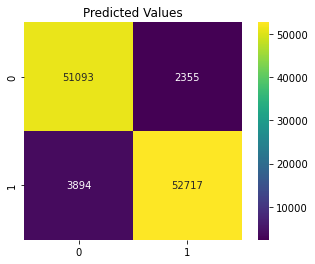

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

### GradientBoostingClassifier

In [145]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='pink',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.8951380623120326
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     55084
           1       0.89      0.90      0.90     54975

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



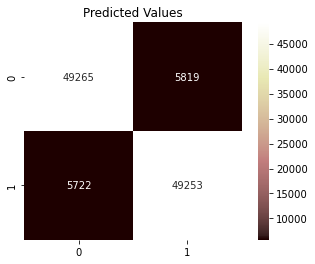

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

### AdaBoostClassifier

In [147]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='icefire',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.8639366158151537
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     57372
           1       0.84      0.88      0.86     52687

    accuracy                           0.86    110059
   macro avg       0.86      0.86      0.86    110059
weighted avg       0.86      0.86      0.86    110059



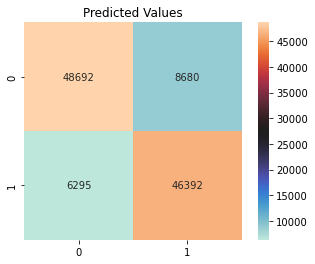

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

### ExtraTreesClassifier

In [155]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='crest',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.9410134564188299
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     53957
           1       0.95      0.93      0.94     56102

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



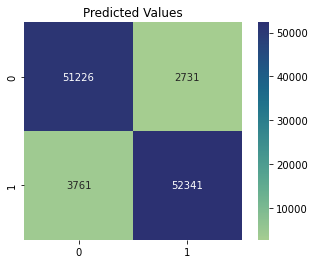

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
etc.fit(x_train,y_train)
pred=etc.predict(x_test)
confusion_plot()

### Cross validation

In [154]:
for model in models:
    print(model)
    score=cross_val_score(model,x,y,cv=5)
    print(score)
    print(score.mean())
    print('---------------------------------------------------------')

LogisticRegression()
[0.76848432 0.80695896 0.80485744 0.80410783 0.80702448]
0.7982866067620265
---------------------------------------------------------
DecisionTreeClassifier()
[0.79279844 0.91986153 0.91791146 0.91864744 0.92066456]
0.8939766868561024
---------------------------------------------------------
KNeighborsClassifier()
[0.86151582 0.90609625 0.9035872  0.90537262 0.90458213]
0.8962308029982434
---------------------------------------------------------
RandomForestClassifier()
[0.81243782 0.96427841 0.96444148 0.96367824 0.96430518]
0.9338282267997853
---------------------------------------------------------
AdaBoostClassifier()
[0.80036253 0.8772573  0.87416181 0.87499319 0.87786894]
0.8609287531487955
---------------------------------------------------------
GradientBoostingClassifier()
[0.82267319 0.90653238 0.90486834 0.90527722 0.90811209]
0.889492642409731
---------------------------------------------------------
ExtraTreesClassifier()
[0.84792771 0.95984899 0.95866

### ExtraTreesClassifier is Best Model

In [156]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.9411679190252501
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     53908
           1       0.95      0.93      0.94     56151

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



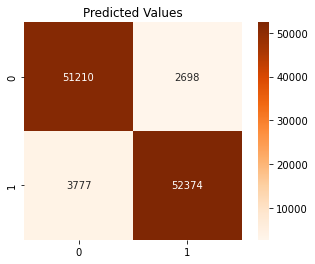

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
etc.fit(x_train,y_train)
pred=etc.predict(x_test)
confusion_plot()

### Hyper Parameter Tuning is the best Classification ML Model

In [ ]:
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[30,40],
    'n_estimators':[300,350],
    'min_samples_split':[3,4],
    'random_state':[42,72]
}
GSCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)
GSCV.fit(x_train,y_train)
GSCV.best_params_

In [159]:
final_model=ExtraTreesClassifier(criterion='entropy',max_depth=30,n_estimators=350,min_samples_split=3,random_state=72)
final_model.fit(x_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=30, min_samples_split=3,
                     n_estimators=350, random_state=72)

In [161]:
final_model_pred=final_model.predict(x_test)
print('Accuracy score for the best model is:',accuracy_score(final_model_pred,y_test)*100)

Accuracy score for the best model is: 93.6543126868316


In [162]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(final_model_pred,y_test))
    print(classification_report(final_model_pred,y_test))
    matrix=confusion_matrix(final_model_pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

accuracy_score:- 0.9365431268683161
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     54341
           1       0.94      0.93      0.94     55718

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



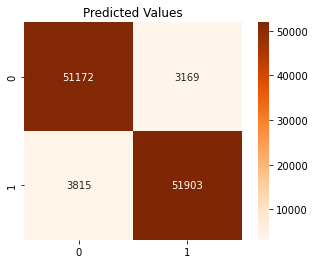

In [163]:
confusion_plot()

### ROC Curve

In [164]:
pred_prob=final_model.predict_proba(x_test)

In [165]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=2

In [166]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

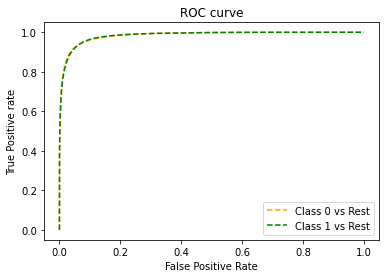

In [167]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC curve',dpi=300); 

### Save the model

In [ ]:
#save the model
joblib.dump(final_model,'micro_credit_defaulter.obj')

In [ ]:
#load the model 
joblib.load('micro_credit_defaulter.obj')